In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

In [7]:
df=pd.read_csv('/content/train (2).csv')

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.shape

(891, 12)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 891 entries, 0 to 890

Data columns (total 11 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  891 non-null    int64  

 1   Survived     891 non-null    int64  

 2   Pclass       891 non-null    int64  

 3   Name         891 non-null    object 

 4   Sex          891 non-null    object 

 5   Age          891 non-null    float64

 6   SibSp        891 non-null    int64  

 7   Parch        891 non-null    int64  

 8   Ticket       891 non-null    object 

 9   Fare         891 non-null    float64

 10  Embarked     891 non-null    object 

dtypes: float64(2), int64(5), object(4)

memory usage: 76.7+ KB


In [10]:
# Checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Removing cabin column because of the null values
df=df.drop('Cabin', axis=1)

In [14]:
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [15]:
# Filling age null values with the mean of the column
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [17]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [18]:
df['Embarked'].mode()[0]

'S'

In [19]:
# Filling Embarked null values with the mean of the column
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [20]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [6]:
# Checking any duplicates columns
df.duplicated().sum()

0

In [21]:
# Extra statistical measures
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data visualization

### Hetmap

<ipython-input-24-b4b1b00bc1f1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

  sn.heatmap(df.corr())


<Axes: >

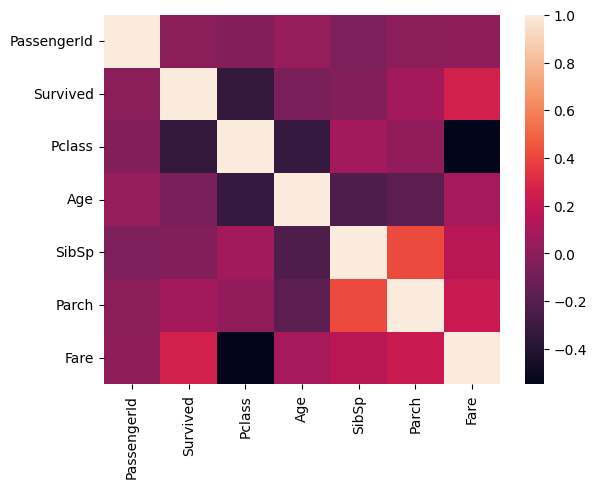

In [24]:
sn.heatmap(df.corr())

### Countplot

<Axes: xlabel='Survived', ylabel='count'>

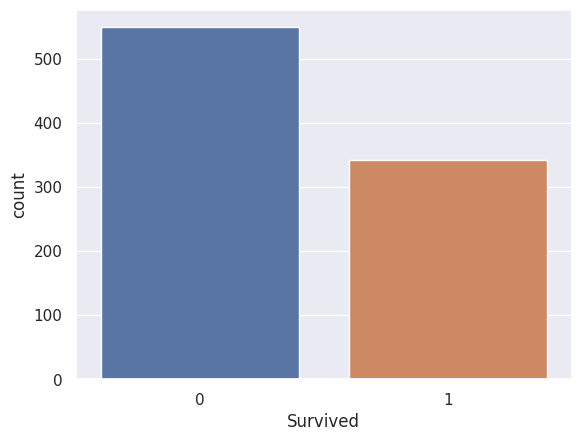

In [30]:
sn.set()

sn.countplot(x=df['Survived'])

<Axes: xlabel='Sex', ylabel='count'>

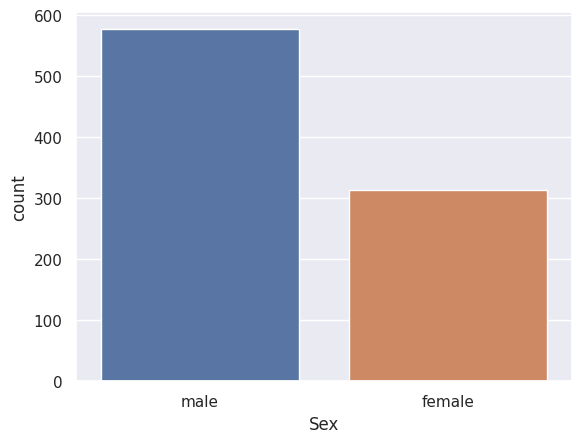

In [34]:
sn.countplot(x=df['Sex'])

<Axes: xlabel='Pclass', ylabel='count'>

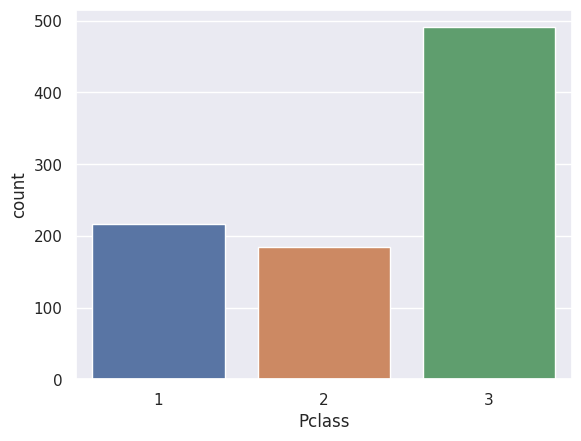

In [37]:
sn.countplot(x=df['Pclass'])

## Encoding Categorical columns

In [39]:
df.dtypes=='object'

PassengerId    False
Survived       False
Pclass         False
Name            True
Sex             True
Age            False
SibSp          False
Parch          False
Ticket          True
Fare           False
Embarked        True
dtype: bool

In [40]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [41]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [46]:
df.replace({'Sex':{'female':0, 'male':1},'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


## Train test split

In [49]:
X=df.drop(columns=['PassengerId','Name','Survived','Ticket'], axis=1)
Y=df['Survived']

In [50]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked

0         3    1  22.000000      1      0   7.2500         0

1         1    0  38.000000      1      0  71.2833         1

2         3    0  26.000000      0      0   7.9250         0

3         1    0  35.000000      1      0  53.1000         0

4         3    1  35.000000      0      0   8.0500         0

..      ...  ...        ...    ...    ...      ...       ...

886       2    1  27.000000      0      0  13.0000         0

887       1    0  19.000000      0      0  30.0000         0

888       3    0  29.699118      1      2  23.4500         0

889       1    1  26.000000      0      0  30.0000         1

890       3    1  32.000000      0      0   7.7500         2



[891 rows x 7 columns]


In [51]:
print(Y)

0      0

1      1

2      1

3      1

4      0

      ..

886    0

887    1

888    0

889    1

890    0

Name: Survived, Length: 891, dtype: int64


In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [53]:
print(X.shape, X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


In [58]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [59]:
print(X_train)

[[-1.55247675  0.74242727  0.8049402  ... -0.4841652  -0.09393818

   0.92568406]

 [ 0.8349173  -1.34693328 -2.02710271 ...  0.70454384 -0.32056163

  -0.59998041]

 [ 0.8349173   0.74242727  1.35561521 ... -0.4841652  -0.47889864

  -0.59998041]

 ...

 [-1.55247675  0.74242727  3.24364382 ... -0.4841652   0.35399928

   0.92568406]

 [-1.55247675  0.74242727 -0.00540816 ... -0.4841652   3.89653283

  -0.59998041]

 [-1.55247675  0.74242727 -0.00540816 ... -0.4841652  -0.13086566

  -0.59998041]]


## Model Training

In [60]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [80]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(7,)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [81]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['Accuracy'])

## Training the neural network

In [82]:
history=model.fit(X_train, Y_train,validation_split=0.1, epochs=10)

Epoch 1/10

20/20 [==============================] - 1s 14ms/step - loss: 0.6233 - Accuracy: 0.6938 - val_loss: 0.5544 - val_Accuracy: 0.8472

Epoch 2/10

20/20 [==============================] - 0s 3ms/step - loss: 0.5062 - Accuracy: 0.8016 - val_loss: 0.4584 - val_Accuracy: 0.8194

Epoch 3/10

20/20 [==============================] - 0s 3ms/step - loss: 0.4428 - Accuracy: 0.8188 - val_loss: 0.4145 - val_Accuracy: 0.8056

Epoch 4/10

20/20 [==============================] - 0s 4ms/step - loss: 0.4154 - Accuracy: 0.8234 - val_loss: 0.4098 - val_Accuracy: 0.8194

Epoch 5/10

20/20 [==============================] - 0s 4ms/step - loss: 0.4043 - Accuracy: 0.8266 - val_loss: 0.4098 - val_Accuracy: 0.8194

Epoch 6/10

20/20 [==============================] - 0s 4ms/step - loss: 0.3965 - Accuracy: 0.8313 - val_loss: 0.4046 - val_Accuracy: 0.8333

Epoch 7/10

20/20 [==============================] - 0s 4ms/step - loss: 0.3908 - Accuracy: 0.8344 - val_loss: 0.4060 - val_Accuracy: 0.8333

Epoch

### Visualization

#### Loss

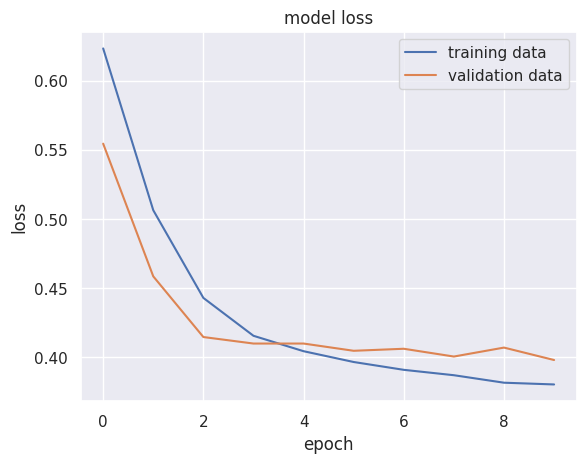

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

#### Accuracy

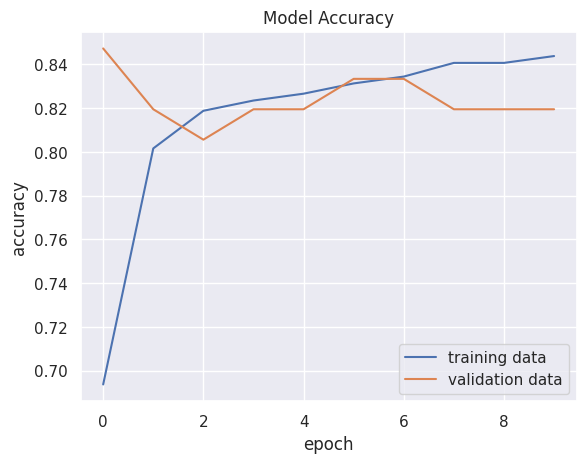

In [86]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

### Loss and Accuracy

In [87]:
loss,accuracy=model.evaluate(X_test,Y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4882 - Accuracy: 0.7877


In [88]:
print(accuracy)

0.7877094745635986


In [89]:
y_pred=model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


In [90]:
y_pred

array([[0.5930066 , 0.3588362 ],
       [0.75264883, 0.2886096 ],
       [0.25553638, 0.7042922 ],
       [0.6726223 , 0.35884738],
       [0.6537786 , 0.1308497 ],
       [0.77617526, 0.26821977],
       [0.7298925 , 0.16901898],
       [0.76396537, 0.2827019 ],
       [0.45272195, 0.3983581 ],
       [0.66694176, 0.3332586 ],
       [0.71862316, 0.31933522],
       [0.1241975 , 0.77904445],
       [0.2260634 , 0.62722224],
       [0.6765345 , 0.35366094],
       [0.6765345 , 0.35366094],
       [0.5266649 , 0.4655814 ],
       [0.7523643 , 0.2755477 ],
       [0.8491514 , 0.1503716 ],
       [0.2925967 , 0.65982   ],
       [0.92652535, 0.06739731],
       [0.5234375 , 0.5448861 ],
       [0.40276647, 0.5126041 ],
       [0.6995109 , 0.21482514],
       [0.5333941 , 0.46456307],
       [0.70606446, 0.30496815],
       [0.26848474, 0.5948088 ],
       [0.21325588, 0.6567453 ],
       [0.54870915, 0.42067203],
       [0.76756155, 0.28044713],
       [0.78350234, 0.19028927],
       [0.